In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Data

In [2]:
df = pd.read_csv("housingData.csv")

In [3]:
df.rename(columns={"MEDV":"Price"},inplace=True)

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df["TAX"] = df["TAX"].astype(float)
df["RAD"] = df["RAD"].astype(float)

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.isnull().sum()


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
Price       0
dtype: int64

## Handling Null values

In [9]:
def replaceNullValues(df):
    column_name = ["CRIM","ZN","INDUS","CHAS","AGE","LSTAT"]
    for i in column_name:
        avg = df[i].mean()
        df[i].fillna(avg,inplace = True)

In [10]:
replaceNullValues(df)
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [11]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.182930,0.391161,-0.052223,0.410377,-0.215434,0.344934,-0.366523,0.608886,0.566528,0.273384,-0.370163,0.434044,-0.379695
ZN,-0.182930,1.000000,-0.513336,-0.036147,-0.502287,0.316550,-0.541274,0.638388,-0.306316,-0.308334,-0.403085,0.167431,-0.407549,0.365943
INDUS,0.391161,-0.513336,1.000000,0.058035,0.740965,-0.381457,0.614592,-0.699639,0.593176,0.716062,0.384806,-0.354597,0.567354,-0.478657
CHAS,-0.052223,-0.036147,0.058035,1.000000,0.073286,0.102284,0.075206,-0.091680,0.001425,-0.031483,-0.109310,0.050055,-0.046166,0.179882
NOX,0.410377,-0.502287,0.740965,0.073286,1.000000,-0.302188,0.711461,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.572379,-0.427321
RM,-0.215434,0.316550,-0.381457,0.102284,-0.302188,1.000000,-0.241351,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.602962,0.695360
AGE,0.344934,-0.541274,0.614592,0.075206,0.711461,-0.241351,1.000000,-0.724353,0.449989,0.500589,0.262723,-0.265282,0.574893,-0.380223
DIS,-0.366523,0.638388,-0.699639,-0.091680,-0.769230,0.205246,-0.724353,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483429,0.249929
RAD,0.608886,-0.306316,0.593176,0.001425,0.611441,-0.209847,0.449989,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.468440,-0.381626
TAX,0.566528,-0.308334,0.716062,-0.031483,0.668023,-0.292048,0.500589,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524545,-0.468536


# Exploratory Data Analysis

<Axes: >

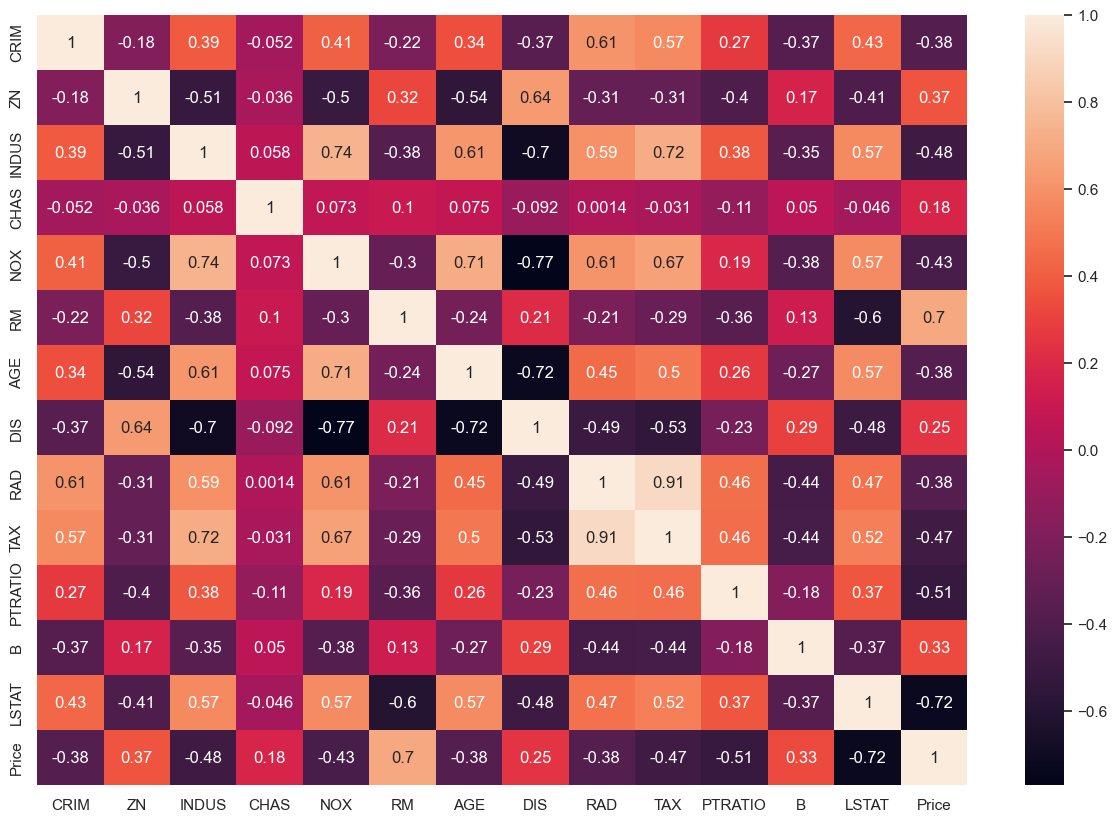

In [12]:
sns.set(rc ={"figure.figsize":(15,10)})
sns.heatmap(df.corr(),annot = True)

<Axes: xlabel='RM', ylabel='Price'>

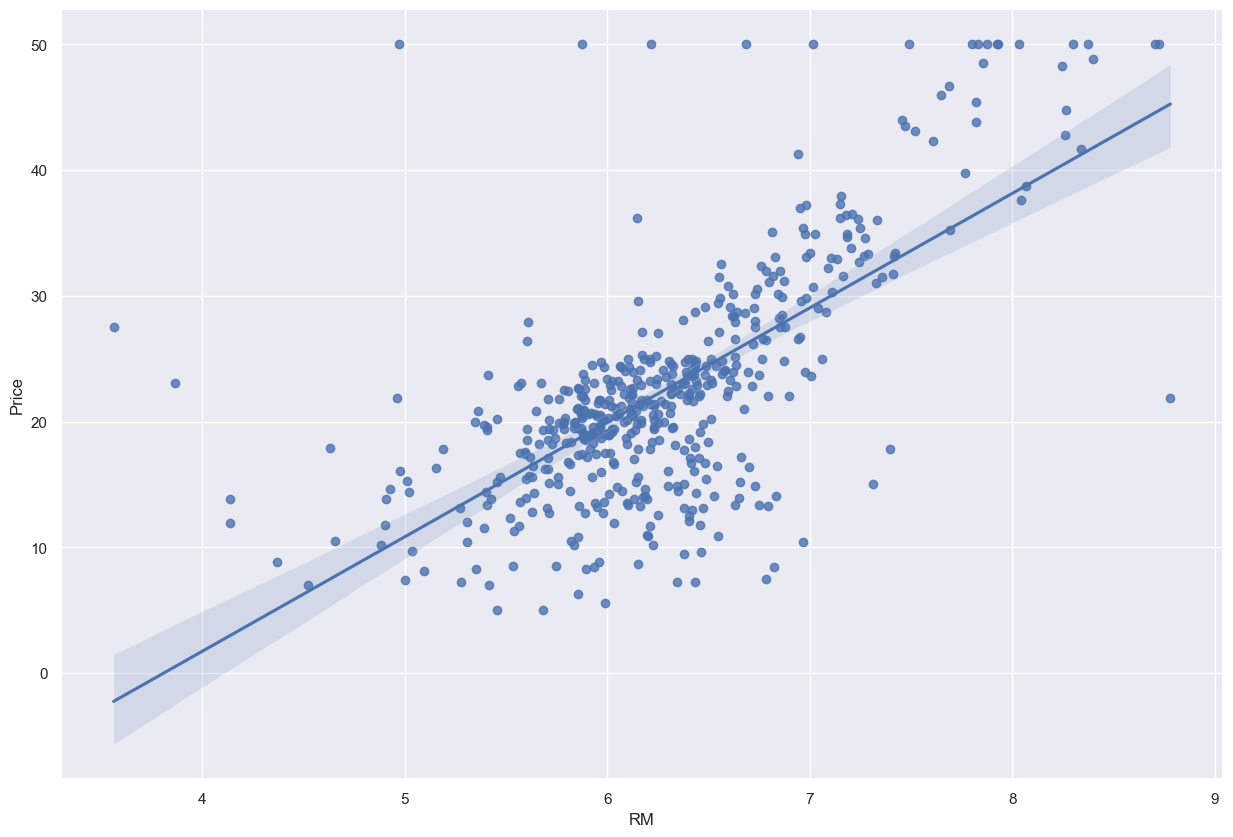

In [13]:
sns.regplot(x = "RM",y = "Price",data  = df)

<Axes: xlabel='LSTAT', ylabel='Price'>

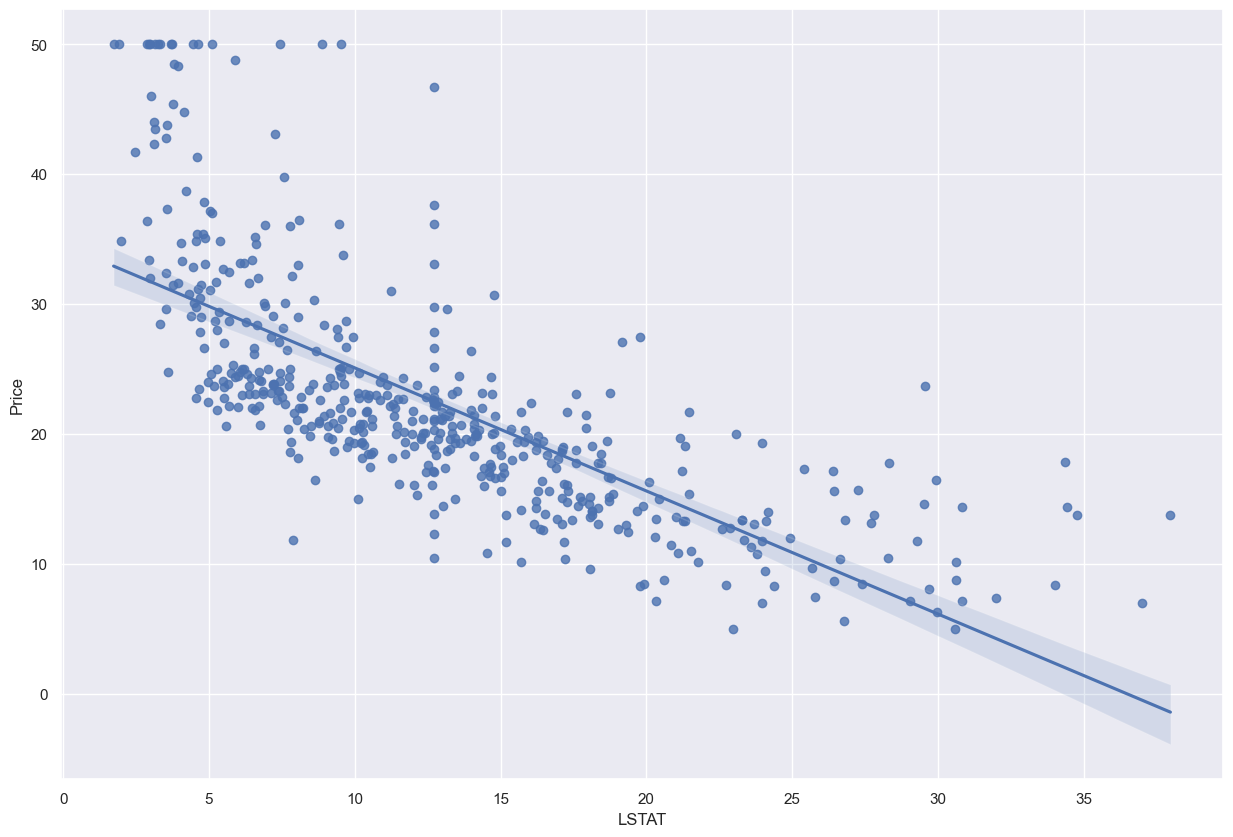

In [14]:
sns.regplot(x = "LSTAT",y = "Price",data  = df)

<Axes: >

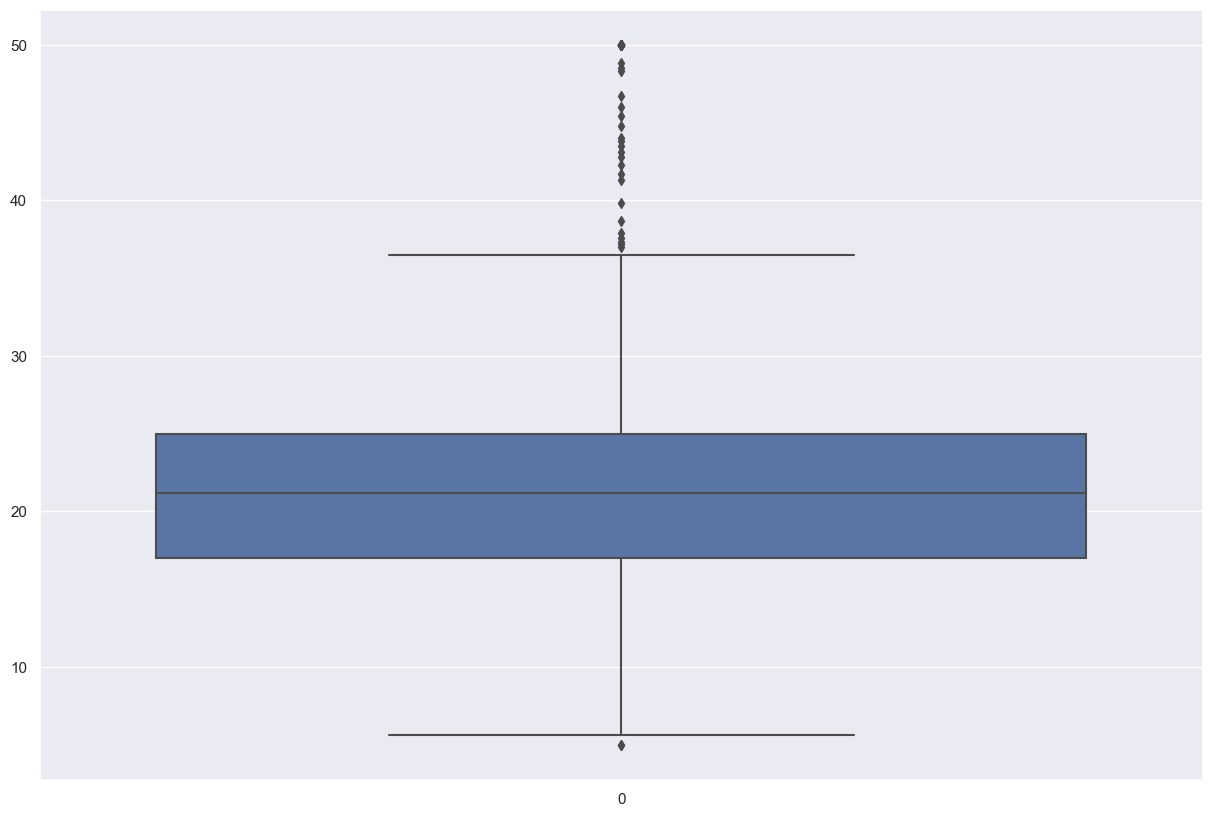

In [15]:
sns.boxplot(df["Price"])

<Axes: >

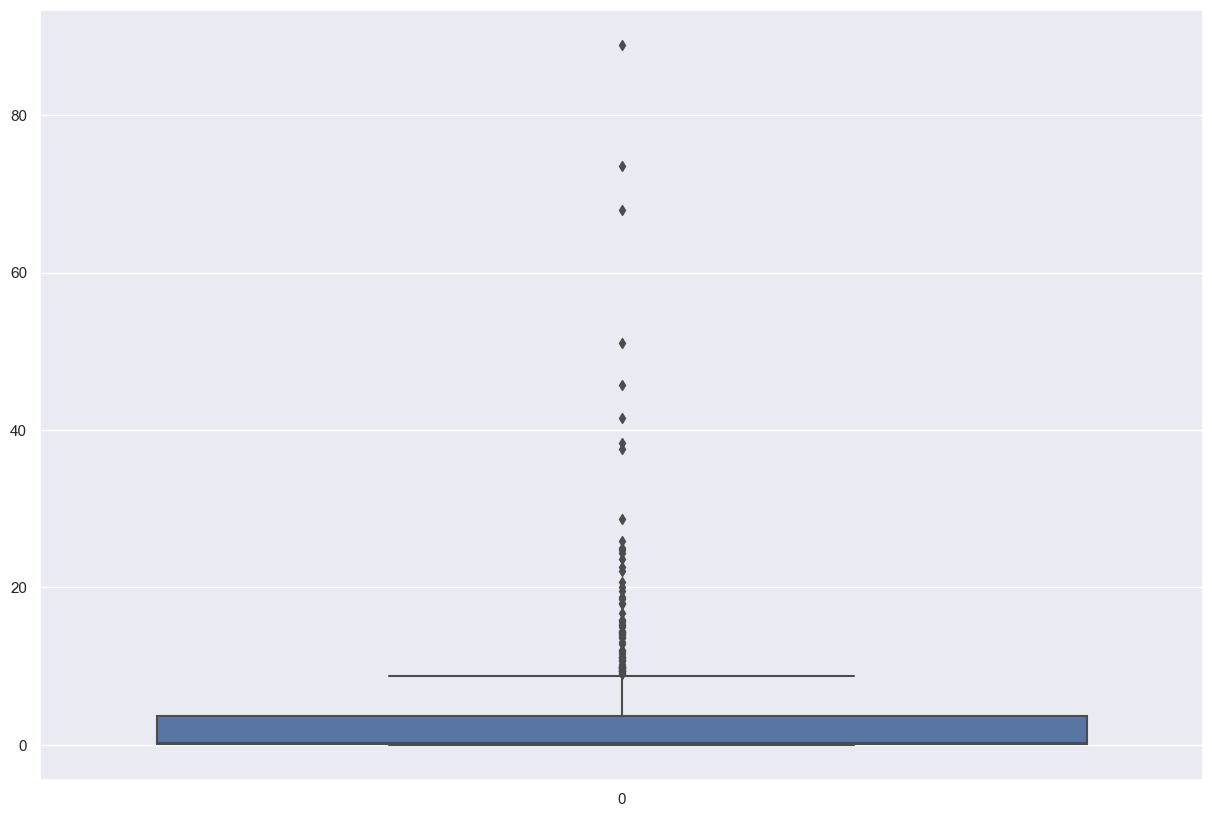

In [16]:
sns.boxplot(df["CRIM"])

In [17]:
## Independent Features And Dependent Features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [18]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,12.715432


In [19]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

# Splitting data 

In [20]:
from sklearn.model_selection import train_test_split


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [22]:
X_train


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
478,10.23300,0.0,18.10,0.0,0.614,6.185,96.7,2.1705,24.0,666.0,20.2,379.70,18.03
26,0.67191,0.0,8.14,0.0,0.538,5.813,90.3,4.6820,4.0,307.0,21.0,376.88,14.81
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
492,0.11132,0.0,27.74,0.0,0.609,5.983,83.5,2.1099,4.0,711.0,20.1,396.90,13.35
108,0.12802,0.0,8.56,0.0,0.520,6.474,97.1,2.4329,5.0,384.0,20.9,395.24,12.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [23]:
y_train

478    14.6
26     16.6
7      27.1
492    20.1
108    19.8
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: Price, Length: 339, dtype: float64

In [24]:
X_test


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.091780,0.0,11.083992,0.0,0.510,6.416,68.518519,2.6463,5.0,296.0,16.6,395.50,9.04
274,0.056440,40.0,6.410000,1.0,0.447,6.758,32.900000,4.0776,4.0,254.0,17.6,396.90,3.53
491,0.105740,0.0,27.740000,0.0,0.609,5.983,98.800000,1.8681,4.0,711.0,20.1,390.11,18.07
72,0.091640,0.0,10.810000,0.0,0.413,6.065,7.800000,5.2873,4.0,305.0,19.2,390.91,5.52
452,5.090170,0.0,18.100000,0.0,0.713,6.297,91.800000,2.3682,24.0,666.0,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0.107930,0.0,8.560000,0.0,0.520,6.195,54.400000,2.7778,5.0,384.0,20.9,393.49,13.00
321,0.181590,0.0,7.380000,0.0,0.493,6.376,54.300000,4.5404,5.0,287.0,19.6,396.90,6.87
265,0.761620,20.0,3.970000,0.0,0.647,5.560,62.800000,1.9865,5.0,264.0,13.0,392.40,10.45
29,1.002450,0.0,8.140000,0.0,0.538,6.674,87.300000,4.2390,4.0,307.0,21.0,380.23,11.98


In [25]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
110    21.7
321    23.1
265    22.8
29     21.0
262    48.8
Name: Price, Length: 167, dtype: float64

## Standardize the datasets

In [26]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
scaler

StandardScaler()

In [28]:
X_train = scaler.fit_transform(X_train)

In [29]:
X_test = scaler.transform(X_test)

In [30]:
X_train

array([[ 0.90211129, -0.51725754,  1.02577067, ...,  0.86442095,
         0.24040357,  0.78150569],
       [-0.35389579, -0.51725754, -0.44891636, ...,  1.22118698,
         0.20852839,  0.32207459],
       [-0.42317323,  0.03288813, -0.48889282, ..., -1.36536677,
         0.43481957,  0.94130781],
       ...,
       [-0.44019045,  3.00367473, -1.35652996, ..., -0.56264319,
         0.36745216, -0.93636713],
       [ 1.0239406 , -0.51725754,  1.02577067, ...,  0.86442095,
        -2.80977992,  1.52915133],
       [-0.41211086, -0.51725754, -0.38673076, ...,  1.17659123,
        -3.25117205, -0.27432976]])

In [31]:
X_test

array([[-0.43010544, -0.51725754, -0.01302615, ..., -0.74102621,
         0.41899501, -0.5011917 ],
       [-0.43474794,  1.2432086 , -0.7050618 , ..., -0.29506866,
         0.43481957, -1.28736107],
       [-0.42827157, -0.51725754,  2.45307819, ...,  0.8198252 ,
         0.35807046,  0.78721291],
       ...,
       [-0.3421109 ,  0.36297553, -1.06633051, ..., -2.34647337,
         0.38395492, -0.30001225],
       [-0.3104739 , -0.51725754, -0.44891636, ...,  1.22118698,
         0.2463943 , -0.08171113],
       [ 0.03231704,  0.36297553, -1.06633051, ..., -2.34647337,
         0.32133488, -0.94778156]])

#  Linear Regression


In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
regression = LinearRegression()

In [34]:
regression.fit(X_train,y_train)

LinearRegression()

In [35]:
print(regression.coef_)

[-0.95689125  0.76564769 -0.0275685   0.99758886 -1.73502958  3.0700712
 -0.77852723 -3.16148806  1.62771195 -1.11340588 -2.02547903  1.03592543
 -3.29752116]


In [36]:
print(regression.intercept_)

22.970796460176988


In [37]:
## prediction for test data

reg_pred = regression.predict(X_test)

In [38]:
reg_pred

array([ 2.89327828e+01,  3.72264420e+01,  1.53900739e+01,  2.57185341e+01,
        1.83596001e+01,  2.29554589e+01,  1.79744238e+01,  1.44658802e+01,
        2.20164734e+01,  2.07826529e+01,  2.52375783e+01,  1.86049092e+01,
       -5.97686216e+00,  2.19128236e+01,  1.89542357e+01,  2.52634479e+01,
        1.93898010e+01,  6.10283345e+00,  4.07365828e+01,  1.70418841e+01,
        2.50043963e+01,  3.04300577e+01,  1.12948841e+01,  2.26459624e+01,
        1.74059694e+01,  1.51957538e+01,  2.15647727e+01,  1.42789088e+01,
        2.32314685e+01,  1.95702105e+01,  2.22135154e+01,  2.51339260e+01,
        2.51848660e+01,  1.72517881e+01,  1.62269758e+01,  1.72020945e+01,
        3.06696868e+01,  2.02682921e+01,  2.48033988e+01,  2.29730392e+01,
        1.46046930e+01,  3.16248324e+01,  4.27196491e+01,  1.80945478e+01,
        2.72906158e+01,  1.65123231e+01,  1.38565860e+01,  2.66063921e+01,
        1.97032124e+01,  3.01632377e+01,  2.09122025e+01,  3.32819532e+01,
        1.58148322e+01,  

## Assumptions of Linear Regression


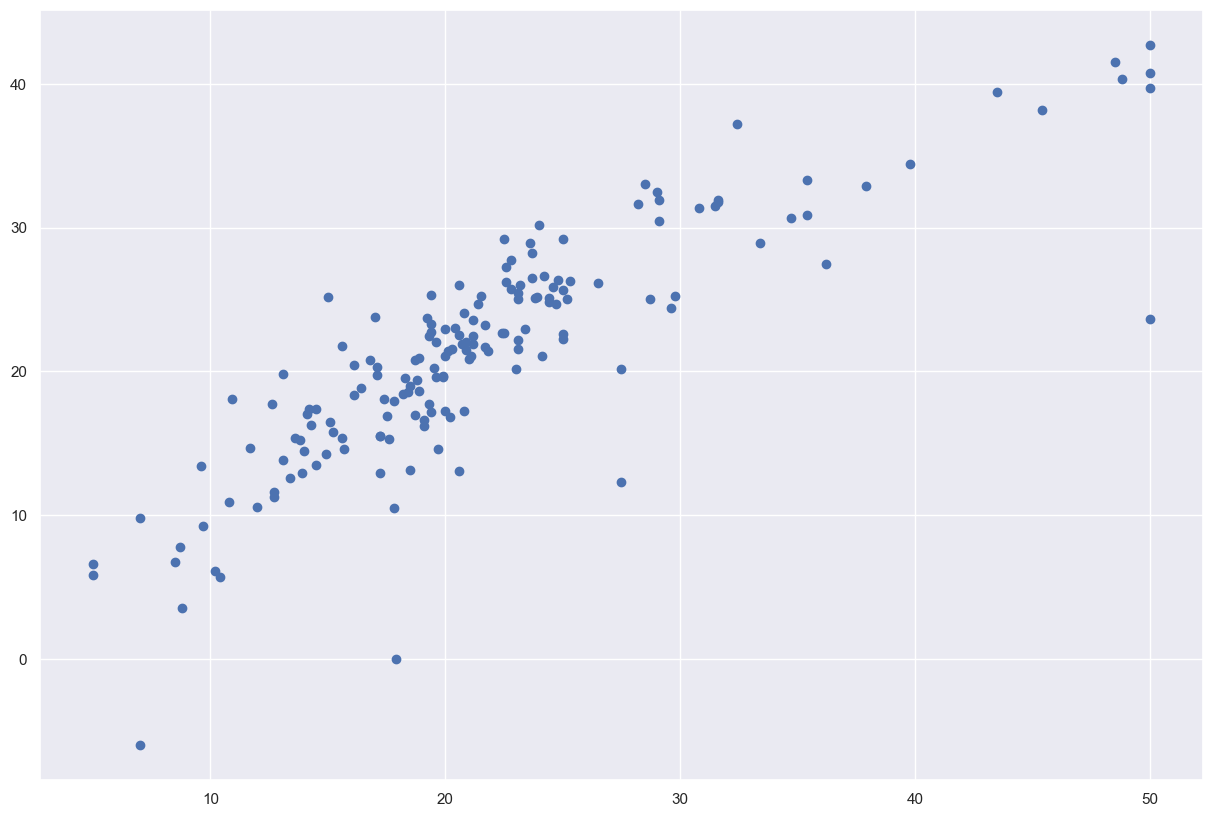

In [40]:
plt.scatter(y_test,reg_pred)

### Residuals

In [41]:


residual = y_test - reg_pred

In [42]:
residual


173   -5.332783
274   -4.826442
491   -1.790074
72    -2.918534
452   -2.259600
         ...   
110   -0.001097
321   -1.916702
265   -4.981988
29     0.171428
262    8.468084
Name: Price, Length: 167, dtype: float64

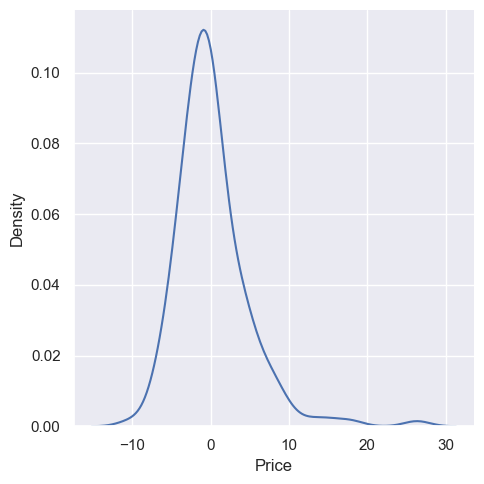

In [43]:
sns.displot(residual,kind = "kde")

## Error 

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [45]:
mse = mean_squared_error(reg_pred,y_test)
mae = mean_absolute_error(y_test,reg_pred)
rmse = np.sqrt(mse)

In [46]:
print(mse)
print(mae)
print(rmse)

21.047043957270304
3.1289564965046806
4.5877057400481025


# Performance Metrics

In [47]:
from sklearn.metrics import r2_score

R2 = r2_score(y_test,reg_pred)
R2

0.7218887579855515

In [50]:
adj_R2 = 1 - (((1-(R2))*(len(y) - 1))/(len(y) - len(X.keys())-1))
print(adj_R2)

0.714540290208747


# Ridge Regression

In [51]:
from sklearn.linear_model import Ridge

In [52]:
ridge_reg = Ridge()

In [53]:
ridge_reg.fit(X_train,y_train)


Ridge()

In [54]:
print(ridge_reg.coef_)

[-0.94543116  0.74840026 -0.04362823  1.00157709 -1.70102613  3.07180902
 -0.77397481 -3.11584286  1.56461695 -1.06324643 -2.01447355  1.0326108
 -3.29214343]


In [55]:
print(ridge_reg.intercept_)

22.970796460176988


In [56]:
ridge_reg_pred = ridge_reg.predict(X_test)

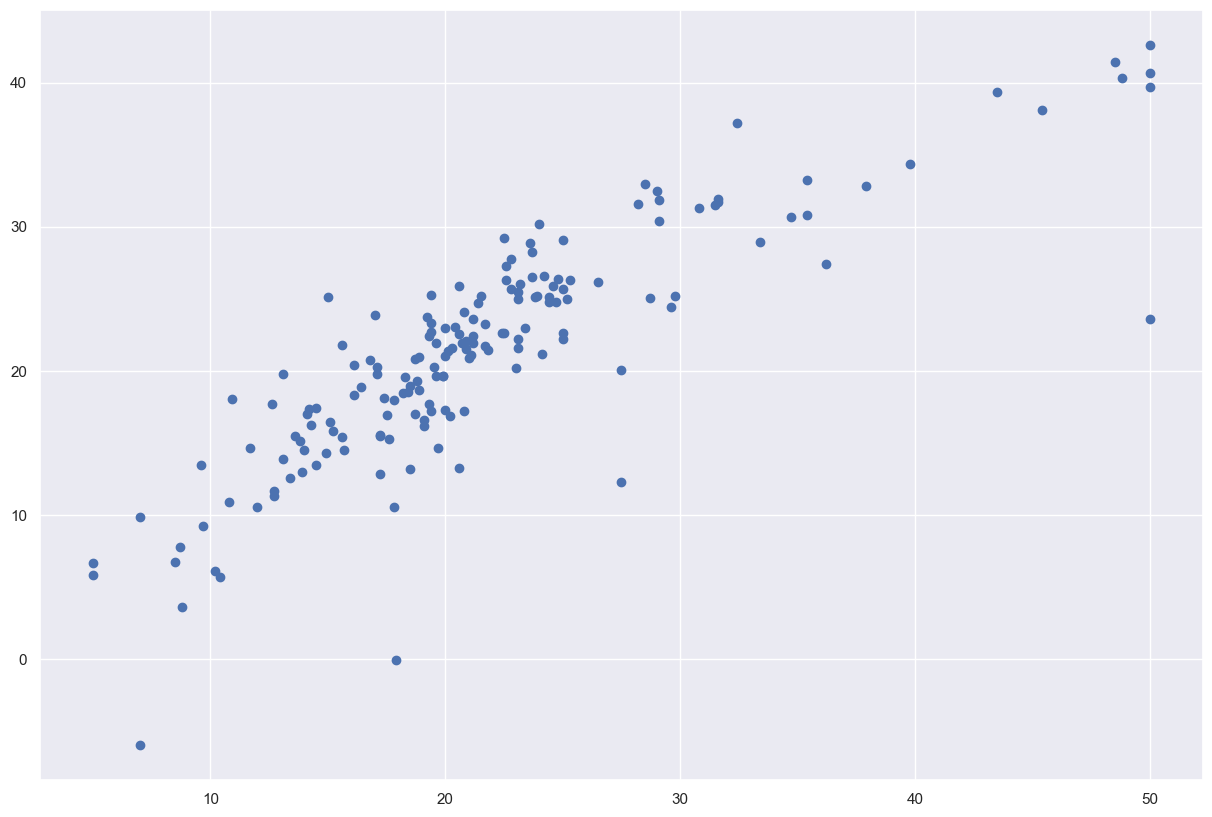

In [57]:
plt.scatter(y_test,ridge_reg_pred)

In [58]:
residual = y_test - ridge_reg_pred

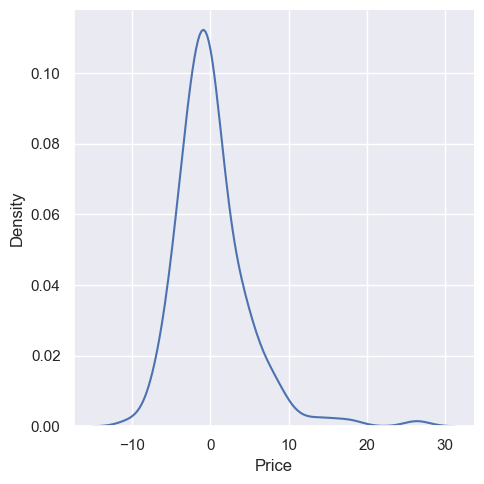

In [59]:
sns.displot(residual,kind  = "kde")

In [60]:
mse1 = mean_squared_error(ridge_reg_pred,y_test)
mae1 = mean_absolute_error(y_test,ridge_reg_pred)
rmse1 = np.sqrt(mse1)

In [61]:
print(mse1)
print(mae1)
print(rmse1)

21.06885288996883
3.1280159361608457
4.590082013425123


In [62]:
ridge_R2 = r2_score(y_test,ridge_reg_pred)
ridge_R2

0.7216005793048726

In [64]:
adj_ridge_R2 = 1 - (((1-(ridge_R2))*(len(y) - 1))/(len(y) - len(X.keys())-1))
print(adj_ridge_R2)

0.7142444970507331


# Lasso Regression

In [65]:
from sklearn.linear_model import Lasso

In [66]:
lasso = Lasso()

In [67]:
lasso.fit(X_train,y_train)

Lasso()

In [68]:
print(lasso.coef_)

[-0.          0.         -0.          0.34574445 -0.          2.86947681
 -0.         -0.         -0.         -0.         -1.25349699  0.35436331
 -3.4708023 ]


In [70]:
print(lasso.intercept_)

22.970796460176988


In [71]:
lasso_pred = lasso.predict(X_test)

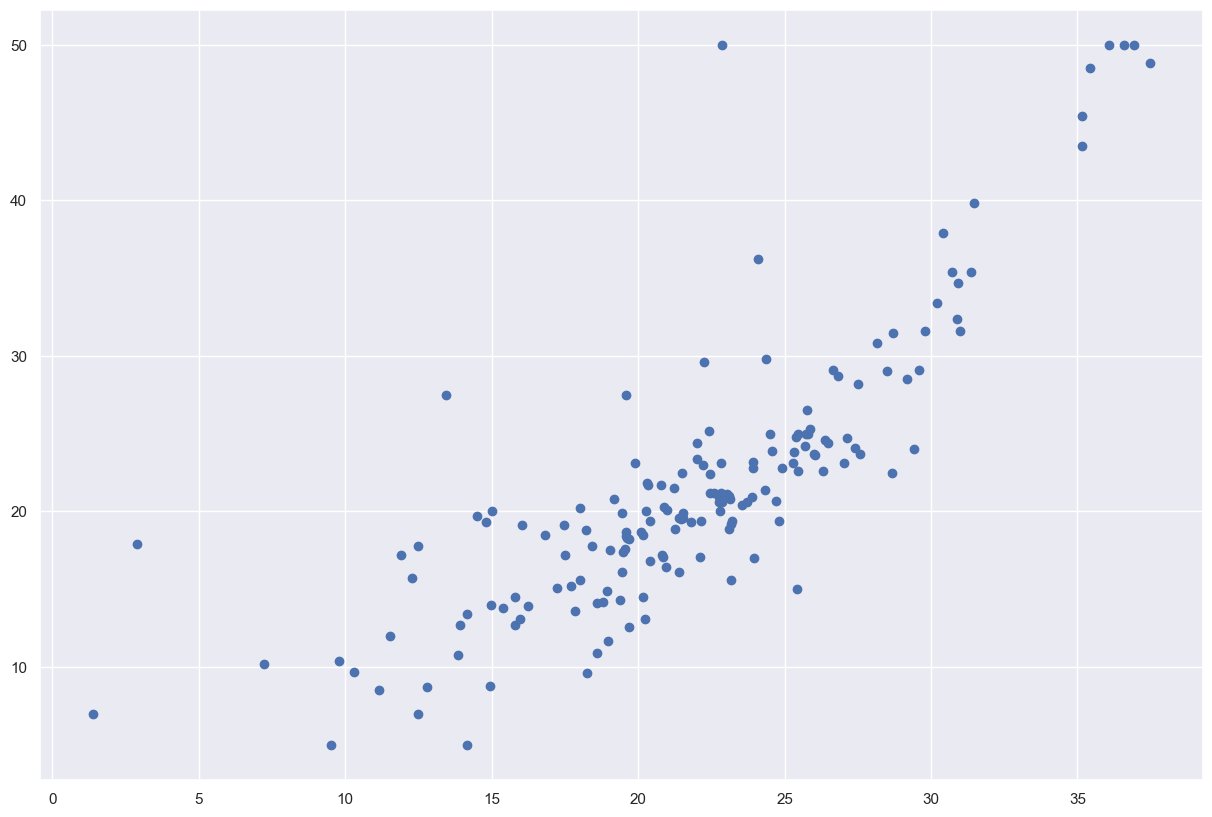

In [72]:
plt.scatter(lasso_pred,y_test)

In [73]:
residuals = y_test - lasso_pred 

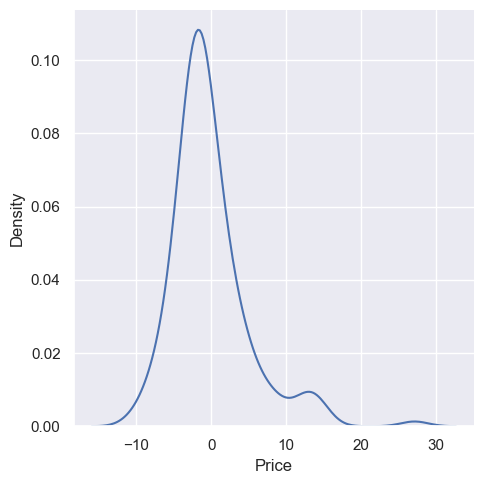

In [74]:
sns.displot(residuals,kind = "kde")

In [75]:
lasso_r2 = r2_score(lasso_pred,y_test)
print(lasso_r2)

0.304758570496517


In [84]:
adj_lasso_r2 = 1 - (((1-lasso_r2)*(len(y) - 1))/(len(y) - len(X.keys())-1))
adj_lasso_r2

0.2863883701234575